### Exercise Sheet  09

#### ExerciseH9.1: Deriving the C-SVM optimization problem

In [38]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC

#### Create training data set

 Generate data for class -1

In [39]:
p = 40 # number of samples from normal distributions for each label value y=-1 and y=1

mu1, sigma = np.asarray([0,1]), np.sqrt(0.1) # mean1 and standard deviation
mu2, sigma = np.asarray([1,0]), np.sqrt(0.1) # mean2 and standard deviation

n1 = np.random.normal(mu1, sigma, size=[p, 2])
n2 = np.random.normal(mu2, sigma, size=[p, 2])

## np.mean(n1, axis = 0), np.mean(n2, axis = 0)

choice = np.random.choice([0,1],p)
sample1 = np.where(choice, n1.T, n2.T).T   # p(x|y = 0) = 0.5*[N(x|mu1,sigma) + N(x|mu2, sigma)]
# sample1.mean(axis = 0)

Generate data for class 1

In [40]:
mu3, sigma = np.asarray([0,0]), np.sqrt(0.1) # mean3 and standard deviation
mu4, sigma = np.asarray([1,1]), np.sqrt(0.1) # mean4 and standard deviation

n3 = np.random.normal(mu3, sigma, size=[p, 2])
n4 = np.random.normal(mu4, sigma, size=[p, 2])

## np.mean(n3, axis = 0), np.mean(n4, axis = 0)

choice = np.random.choice([0,1],p)
sample2 = np.where(choice, n3.T, n4.T).T   # p(x|y = 1) = 0.5*[N(x|mu3,sigma) + N(x|mu4, sigma)]

In [41]:
class0_data = np.concatenate((sample1.T, -np.ones((p, 1)).T), axis = 0).T
class1_data = np.concatenate((sample2.T, np.ones((p, 1)).T), axis = 0).T

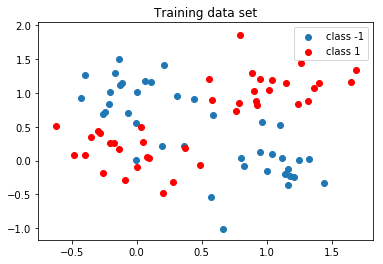

In [42]:
plt.scatter(class0_data[:, 0], class0_data[:,1], label = "class -1")
plt.scatter(class1_data[:, 0], class1_data[:,1], label = "class 1",color = "red")
plt.title("Training data set")
plt.legend()

In [43]:
training = np.concatenate([class0_data, class1_data])

#### Create test data set

Generate data for class -1

In [44]:
p = 40 # number of samples from normal distributions for each label value y=-1 and y=1

mu1, sigma = np.asarray([0,1]), np.sqrt(0.1) # mean1 and standard deviation
mu2, sigma = np.asarray([1,0]), np.sqrt(0.1) # mean2 and standard deviation

n1 = np.random.normal(mu1, sigma, size=[p, 2])
n2 = np.random.normal(mu2, sigma, size=[p, 2])

## np.mean(n1, axis = 0), np.mean(n2, axis = 0)

choice = np.random.choice([0,1],p)
sample1 = np.where(choice, n1.T, n2.T).T   # p(x|y = 0) = 0.5*[N(x|mu1,sigma) + N(x|mu2, sigma)]

Generate data for class 1

In [45]:
mu3, sigma = np.asarray([0,0]), np.sqrt(0.1) # mean3 and standard deviation
mu4, sigma = np.asarray([1,1]), np.sqrt(0.1) # mean4 and standard deviation

n3 = np.random.normal(mu3, sigma, size=[p, 2])
n4 = np.random.normal(mu4, sigma, size=[p, 2])

## np.mean(n3, axis = 0), np.mean(n4, axis = 0)

choice = np.random.choice([0,1],p)
sample2 = np.where(choice, n3.T, n4.T).T   # p(x|y = 1) = 0.5*[N(x|mu3,sigma) + N(x|mu4, sigma)]

In [46]:
class0_data = np.concatenate((sample1.T, -np.ones((p, 1)).T), axis = 0).T
class1_data = np.concatenate((sample2.T, np.ones((p, 1)).T), axis = 0).T

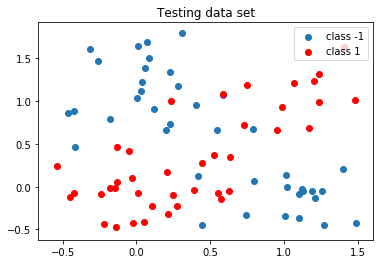

In [47]:
plt.scatter(class0_data[:, 0], class0_data[:,1], label = "class -1")
plt.scatter(class1_data[:, 0], class1_data[:,1], label = "class 1",color = "red")
plt.title("Testing data set")
plt.legend()

In [48]:
testing = np.concatenate([class0_data, class1_data])

#### Train the C-SVM on the training data with RBF kernel and the software’s standard parameters.

In [49]:
Xtrain = training[:, :2]
ytrain = training[:,2]

In [50]:
clf = SVC()
svc = clf.fit(Xtrain, ytrain) 

In [51]:
Xtest = testing[:,:2]
ytest = testing[:,2]

#### Classify the test data and report the classiﬁcation error quantiﬁed by the 0/1 loss function (percentage of wrong predictions).

In [52]:
y_predicted = clf.predict(Xtest)

In [53]:
classification_error = (1 - float(np.sum(np.equal(y_predicted, ytest)))/ytest.shape[0])*100
print("Percentage of wrong predictions: %0.2f" %classification_error)

Percentage of wrong predictions: 12.50


#### Visualize the results as in exercise H7.2: plot the training patterns and the decision boundary (e.g. with a contour plot) in input space. Additionally, highlight the support vectors.


NameError: name 'support_vectors' is not defined

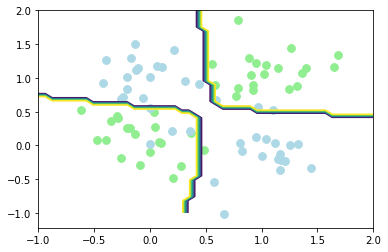

In [54]:
n = 50
x = np.linspace(-1, 2, n)
X, Y = np.meshgrid(x, x)
points = np.vstack([X.flatten(), Y.flatten()]).T



Z = np.zeros(shape=(n,n)).flatten()
Z = svc.predict(points)
Z = Z.reshape((n,n))


plt.contour(X, Y, Z)

class_1 = training[training[:,2]==1, :]
class_2 = training[training[:,2]==-1, :]

plt.scatter(class_1[:,0], class_1[:,1], s=60, color = 'lightgreen', label = "class 1")
plt.scatter(class_2[:,0], class_2[:,1], s=60, color = 'lightblue', label = "class -1")
plt.scatter(support_vectors[:,0], support_vectors[:,1], s=60, color = 'orange', label = "support vectors")
plt.legend()

In [55]:
print("Number of support vectors = %i" %svc.support_vectors_.shape[0]) 

Number of support vectors = 52


#### ExerciseH9.3: C-SVM parameter optimization

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [57]:
# Set the parameters by cross-validation

gamma_exponents = np.arange(-5, 10, 2)
C_exponents = np.arange(-6, 11, 2)

gamma = [2*np.exp(exponent) for exponent in gamma_exponents]
C = [2*np.exp(exponent) for exponent in C_exponents]

tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma, 'C': C}]

svm = GridSearchCV(estimator = SVC(), param_grid= tuned_parameters, cv=4)
svm.fit(Xtrain, ytrain)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.004957504353332717, 0.036631277777468357, 0.2706705664732254, 2.0, 14.778112197861301, 109.19630006628847, 806.85758698547022, 5961.9159740834566, 44052.931589613436], 'gamma': [0.013475893998170934, 0.099574136735727889, 0.73575888234288467, 5.4365636569180902, 40.171073846375336, 296.8263182051532, 2193.266316856917, 16206.167855150768]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
X, Y = np.meshgrid(C, gamma)
points = np.vstack([X.flatten(), Y.flatten()]).T

In [331]:
X.shape, Y.shape, points.shape

((8L, 9L), (8L, 9L), (72L, 2L))

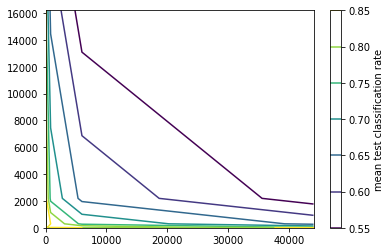

In [332]:
Z = np.zeros(shape=(len(gamma), len(C))).flatten()
Z = svm.cv_results_['mean_test_score']
Z = Z.reshape((len(gamma), len(C)))


CS = plt.contour(X, Y, Z)
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('mean test classification rate')
plt.show()

In [333]:
print('Best score for data1:', svm.best_score_) 

('Best score for data1:', 0.90000000000000002)


In [334]:
# View the best parameters for the model found using grid search
print('Best C:',svm.best_estimator_.C) 
print('Best Gamma:',svm.best_estimator_.gamma)

('Best C:', 5961.9159740834566)
('Best Gamma:', 0.73575888234288467)


In [335]:
svm.score(Xtest, ytest) 

0.80000000000000004

In [336]:
class_performance = SVC(C=0.004957504353332717, kernel='rbf', gamma=5.4365636569180902).fit(Xtrain, ytrain).score(Xtest, ytest)
class_performance

0.90000000000000002

In [337]:
new = SVC(C=0.004957504353332717, kernel='rbf', gamma=5.4365636569180902).fit(Xtrain, ytrain)

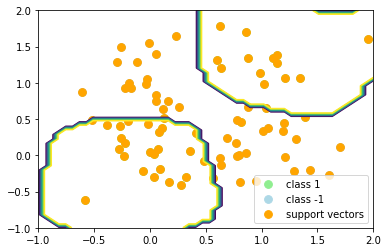

In [342]:
n = 50
x = np.linspace(-1, 2, n)
X, Y = np.meshgrid(x, x)
points = np.vstack([X.flatten(), Y.flatten()]).T



Z = np.zeros(shape=(n,n)).flatten()
Z = new.predict(points)
Z = Z.reshape((n,n))


plt.contour(X, Y, Z)

class_1 = training[training[:,2]==1, :]
class_2 = training[training[:,2]==-1, :]

plt.scatter(class_1[:,0], class_1[:,1], s=60, color = 'lightgreen', label = "class 1")
plt.scatter(class_2[:,0], class_2[:,1], s=60, color = 'lightblue', label = "class -1")
plt.scatter(new.support_vectors_[:,0], new.support_vectors_[:,1], s=60, color = 'orange', label = "support vectors")
plt.legend()

In [346]:
print("Percentage of wrong predictions on the testing set: %0.2f" %((1-class_performance)*100))

Percentage of wrong predictions on the testing set: 10.00


In [350]:
print("Number of support vectors = %i" %new.support_vectors_.shape[0])

Number of support vectors = 80


In [352]:
new1 = SVC(C=0.004957504353332717/4, kernel='rbf', gamma=5.4365636569180902).fit(Xtrain, ytrain)

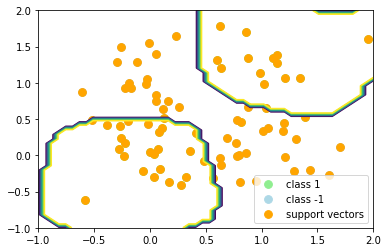

In [353]:
n = 50
x = np.linspace(-1, 2, n)
X, Y = np.meshgrid(x, x)
points = np.vstack([X.flatten(), Y.flatten()]).T



Z = np.zeros(shape=(n,n)).flatten()
Z = new1.predict(points)
Z = Z.reshape((n,n))


plt.contour(X, Y, Z)

class_1 = training[training[:,2]==1, :]
class_2 = training[training[:,2]==-1, :]

plt.scatter(class_1[:,0], class_1[:,1], s=60, color = 'lightgreen', label = "class 1")
plt.scatter(class_2[:,0], class_2[:,1], s=60, color = 'lightblue', label = "class -1")
plt.scatter(new1.support_vectors_[:,0], new1.support_vectors_[:,1], s=60, color = 'orange', label = "support vectors")
plt.legend()

In [357]:
new1 = SVC(C=0.004957504353332717, kernel='rbf', gamma=5.4365636569180902/4).fit(Xtrain, ytrain)

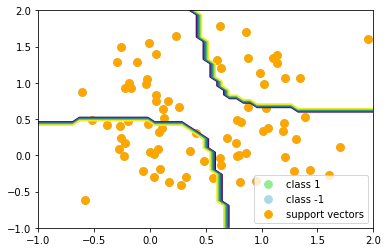

In [358]:
n = 50
x = np.linspace(-1, 2, n)
X, Y = np.meshgrid(x, x)
points = np.vstack([X.flatten(), Y.flatten()]).T



Z = np.zeros(shape=(n,n)).flatten()
Z = new1.predict(points)
Z = Z.reshape((n,n))


plt.contour(X, Y, Z)

class_1 = training[training[:,2]==1, :]
class_2 = training[training[:,2]==-1, :]

plt.scatter(class_1[:,0], class_1[:,1], s=60, color = 'lightgreen', label = "class 1")
plt.scatter(class_2[:,0], class_2[:,1], s=60, color = 'lightblue', label = "class -1")
plt.scatter(new1.support_vectors_[:,0], new1.support_vectors_[:,1], s=60, color = 'orange', label = "support vectors")
plt.legend()